## Stratified k-fold
<h5>https://scikit-learn.org/stable/modules/cross_validation.html</h5>
    
---
<h3> 3.1.2.2.1. Stratified k-fold</h3>

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.<br>
stratify (stratified) : 층을 이루게 하다, 계층화하다. 

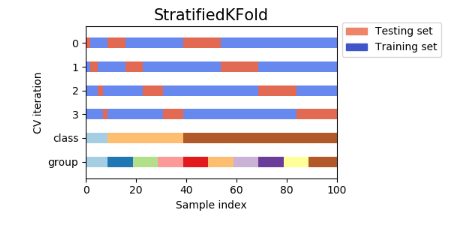



In [3]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

In [27]:
# 45개의 0, 5개의 1로 구성되어있는 Set y
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))

In [21]:
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [65]:
# n_splits 만큼의 fold 진행
skf = StratifiedKFold(n_splits=5)


In [30]:
# 0 : 1개 // 1: 3개 // 2: 1개
a = [1,2,1,1,0]
np.bincount(a)

array([1, 3, 1], dtype=int64)

In [48]:
# StratifiedKFold
for train, test in skf.split(X,y):
    # 5번의 fold로 나누어 train, test set을 구성했을때 
        # train Set : 36개의 [0] , 4개의 [1]
        # test Set : (45/5) = 9개의 [0], (5/5) = 1개의 [1]로 구성
    print('train : {}   ||  test : {}'.format(np.bincount(y[train]),np.bincount((y[test]))))

train : [36  4]   ||  test : [9 1]
train : [36  4]   ||  test : [9 1]
train : [36  4]   ||  test : [9 1]
train : [36  4]   ||  test : [9 1]
train : [36  4]   ||  test : [9 1]


In [53]:
# skf.split(X, y, groups=None)
# Parameters
# ----------
# X : array-like, shape (n_samples, n_features)
#     50개의 샘플, 1개의 feature
#     Training data, where n_samples is the number of samples
#     and n_features is the number of features.

#     Note that providing ``y`` is sufficient to generate the splits and
#     hence ``np.zeros(n_samples)`` may be used as a placeholder for
#     ``X`` instead of actual training data.

# y : array-like, shape (n_samples,)
#     The target variable for supervised learning problems.
#     Stratification is done based on the y labels.

# groups : object
#     Always ignored, exists for compatibility.

# Yields
# ------
# train : ndarray
#     The training set indices for that split.

# test : ndarray
#     The testing set indices for that split.


In [81]:
#K_Fold
kf = KFold(n_splits=2)
print("-----------Shuffle X -----------")
for train, test in kf.split(X,y):
    # 2번의 fold로 나누어 train, test set을 구성했을때 
        #20 + 25 = 45
        # 5 + 0 = 5
        # ~~shuffle 를 하지 않았을경우 한번 test set으로 사용한 데이터는 다시 test set으로 들어가지 않음~~ ==> X
        
    print('train : {}   ||  test : {}'.format(np.bincount(y[train]),np.bincount((y[test]))))

    
print("-----------Shuffle O -----------")
kfS = KFold(n_splits=3,shuffle=True)
for train, test in kfS.split(X,y):
    # shuffle을 해도 test set으로 사용한 데이터는 다시 test set으로 들어가지 않음 but 사용하는 index를 0,1,2,3,4 에서 랜덤하게 바꿈
    print('train : {}   ||  test : {}'.format(np.bincount(y[train]),np.bincount((y[test]))))

-----------Shuffle X -----------
train : [20  5]   ||  test : [25]
train : [25]   ||  test : [20  5]
-----------Shuffle O -----------
train : [30  3]   ||  test : [15  2]
train : [28  5]   ||  test : [17]
train : [32  2]   ||  test : [13  3]
